<a href="https://colab.research.google.com/github/neamagalal/machine/blob/main/assessment_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**import important libraries**

In [ ]:
!pip3 install pyspark

     |████████████████████████████████| 281.3 MB 38 kB/s 
     |████████████████████████████████| 198 kB 59.9 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805912 sha256=e2bf19dd9f1e06a1e11645c97ba761c048b54930bb6c695a32e50e9fce83c602
  Stored in directory: /root/.cache/pip/wheels/0b/de/d2/9be5d59d7331c6c2a7c1b6d1a4f463ce107332b1ecd4e80718
Successfully built pyspark


In [ ]:
!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 2 newly installed, 0 to remove and 37 not upgraded.
Need to get 36.5 MB of archives.
After this operation, 143 MB of additional disk space will be used.
Selecting previously unselected package openjdk-8-jre-headless:amd64.
(Reading database ... 155062 files and directories currently installed.)
Preparing to unpack .../openjdk-8-jre-headless_8u292-b10-0ubuntu1~18.04_amd64.deb ...
Unpacking openjdk-8-jre-headless:amd64 (8u292-b10-0ubuntu1~18.04) ...
Selecting previously unselected package openjdk-8-

In [ ]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip
get_ipython().system_raw('./ngrok http 4050 &')
!sleep 10
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

--2021-10-31 00:03:07--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 54.161.241.46, 52.202.168.65, 54.237.133.81, ...
Connecting to bin.equinox.io (bin.equinox.io)|54.161.241.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.19M  72.1MB/s    in 0.2s    

2021-10-31 00:03:07 (72.1 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13832437/13832437]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   
https://366a-35-221-28-211.ngrok.io


In [ ]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import spacy
import warnings
warnings.filterwarnings("ignore")
import nltk
nltk.download('stopwords')
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE 
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**read sentiment 140 dataset **

In [ ]:
cols = ['sentiment','id','date','query_string','user','text']
data=pd.read_csv('/content/training.1600000.processed.noemoticon.csv',engine='python', error_bad_lines=False,header=None, names=cols , encoding='latin-1')
data1 = data[["text"]]
data.head(10)

,sentiment,id,date,query_string,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


**cleaning data**

In [ ]:
data1['clean_text'] = data1['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data1['clean_text'] = data1['clean_text'].str.replace('https?:\/\/\s+]','')# url
data1['clean_text'] = data1['clean_text'].str.replace('http\S+', '')# url
data1['clean_text'] = data1['clean_text'].str.replace('#','')
data1['clean_text'] = data1['clean_text'].str.replace(r'@[A-Za-z0-9]+@[^a-zA-Z]','')#mention
data1['clean_text'] = data1['clean_text'].str.replace('@\S+','')#mention
data1['clean_text'] = data1['clean_text'].str.replace('rt[\s]','') #retweet
data1['clean_text'] = data1['clean_text'].str.replace('[^\w\s]','')#not letters
data1['clean_text'] = data1['clean_text'].str.replace('[^a-zA-Z]',' ')#not letters
#data1['clean_text'] = data1['clean_text'].str.replace('\'',' ')#not letters
#data1['clean_text'] = data1['clean_text'].str.replace(" '",' ')#not letters
stop = set(stopwords.words('english'))#remove_stopwords
stop.update(["amp","today","one","though","got","day","quot","work","get","im","going","tonight","still","go","cant","ye","thing","back","'","x","us","u","getting","thats","ive","gonna",'\'']) 
data1['clean_text']= data1['clean_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data1.head(50)

,text,clean_text
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww bummer shoulda david carr third
1,is upset that he can't update his Facebook by ...,upset update facebook texting might cry result...
2,@Kenichan I dived many times for the ball. Man...,dived many times ball managed save rest bounds
3,my whole body feels itchy and like its on fire,whole body feels itchy like fire
4,"@nationwideclass no, it's not behaving at all....",behaving mad see
5,@Kwesidei not the whole crew,whole crew
6,Need a hug,need hug
7,@LOLTrish hey long time no see! Yes.. Rains a...,hey long time see yes rains bit bit lol fine t...
8,@Tatiana_K nope they didn't have it,nope didnt
9,@twittera que me muera ?,que muera


**check shape**

In [ ]:
data1.shape

(1600000, 2)

**find most common words**

In [ ]:
from collections import Counter
Counter(" ".join(data1['clean_text']).split()).most_common(100)

[('good', 89432),
 ('like', 77629),
 ('dont', 66924),
 ('love', 63474),
 ('time', 55976),
 ('lol', 55098),
 ('know', 51212),
 ('really', 49522),
 ('see', 45846),
 ('well', 44423),
 ('want', 42077),
 ('new', 41989),
 ('night', 41401),
 ('think', 41055),
 ('thanks', 39346),
 ('home', 39171),
 ('oh', 38116),
 ('much', 36548),
 ('miss', 36113),
 ('need', 35550),
 ('last', 35130),
 ('morning', 33167),
 ('hope', 33065),
 ('great', 32842),
 ('tomorrow', 32466),
 ('ill', 31651),
 ('twitter', 31067),
 ('haha', 30299),
 ('feel', 30011),
 ('sad', 28586),
 ('fun', 27931),
 ('wish', 27647),
 ('right', 27232),
 ('sleep', 26916),
 ('didnt', 26902),
 ('bad', 26773),
 ('would', 26611),
 ('happy', 26392),
 ('sorry', 25428),
 ('come', 24780),
 ('make', 24572),
 ('way', 24053),
 ('nice', 23063),
 ('better', 22819),
 ('watching', 22470),
 ('wait', 21876),
 ('could', 21362),
 ('yeah', 21336),
 ('bed', 21333),
 ('week', 20851),
 ('youre', 20050),
 ('people', 19854),
 ('school', 19659),
 ('hate', 19590),
 ('d

**word cloud to show words**

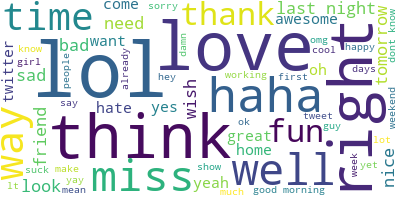

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(data1['clean_text'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=60, contour_width=15, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

**as "sentiment 140" sentiment analysis consider postive and negative only and the assessment ask to be postive/negative/neutral so we can drop sentiment column in "sentiment 140" and use textblob an open-source python library used in sentiment analysis**

In [ ]:
polarity=[]
for i in range(data1.shape[0]):
    polarity.append(TextBlob(data1['clean_text'].iloc[i]).sentiment.polarity)

In [ ]:
data1['polarity']=polarity
data1['class']=''
data1.loc[data1['polarity']>0,'class']='positive'
data1.loc[data1['polarity']==0,'class']='neutral'
data1.loc[data1['polarity']<0,'class']='negative'

data1=data1[['clean_text','class']]
data1.head()

,clean_text,class
0,awww bummer shoulda david carr third,positive
1,upset update facebook texting might cry result...,neutral
2,dived many times ball managed save rest bounds,positive
3,whole body feels itchy like fire,positive
4,behaving mad see,negative


**encoding class **

In [ ]:
le = preprocessing.LabelEncoder()
data1['class']= le.fit_transform(data1['class'])
data1['class'].head()

0    2
1    1
2    2
3    2
4    0
Name: class, dtype: int64

**data is imbalanced**

In [ ]:
data1['class'].value_counts()

2    677756
1    599058
0    323186
Name: class, dtype: int64

In [ ]:
x=data1['clean_text']
y=data1['class']

we have imbalance data 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
#unique words of 
count_vect = CountVectorizer().fit(x)
#back word transform
x = count_vect.transform(x)
x.shape

(1600000, 426828)

In [ ]:
!pip install -U imbalanced-learn
from imblearn.datasets import make_imbalance
x, y = make_imbalance(x,y,sampling_strategy={0: 323186, 1: 323186, 2: 323186},random_state=42)

In [ ]:
y.value_counts()

2    323186
1    323186
0    323186
Name: class, dtype: int64

now data is balance

**after count vectorizer and balanced label split data to train /test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


feature engineering by tf-idf to re-weight the count frequency into floating point suitable for usage by classifier

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer().fit(X_train)
X_train_tf = transformer.transform(X_train)

n-sample is no of tweets and n-feature is no of words

In [ ]:
print("n_samples: %d, n_features: %d" % X_train_tf.shape)

n_samples: 775646, n_features: 426828


In [ ]:
#transforming test data into tf-idf matrix
X_test_tf = transformer.transform(X_test)

In [ ]:
#naive bayes classifier
from sklearn.naive_bayes import MultinomialNB
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_tf, y_train)

MultinomialNB()

In [ ]:
#predicted y
y_pred = naive_bayes_classifier.predict(X_test_tf)

naive bayes

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
# print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.77      0.92      0.84     64621
           1       0.97      0.69      0.81     64503
           2       0.81      0.88      0.84     64788

    accuracy                           0.83    193912
   macro avg       0.85      0.83      0.83    193912
weighted avg       0.85      0.83      0.83    193912



LR

In [ ]:
from sklearn.linear_model import LogisticRegression
# logistic regression object
lr = LogisticRegression(solver='liblinear',random_state=42)
 
# train the model on train set
lr.fit(X_train_tf, y_train)
 
predictions = lr.predict(X_test_tf)
 
# print classification report
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.97      0.97      0.97     64621
           1       0.97      0.98      0.98     64503
           2       0.98      0.96      0.97     64788

    accuracy                           0.97    193912
   macro avg       0.97      0.97      0.97    193912
weighted avg       0.97      0.97      0.97    193912



In [ ]:
since='2020-01-01'

In [ ]:
#!pip install --user tweepy
import tweepy
auth = tweepy.OAuthHandler("IkAmCtaB5EGLWJELkOlTL9ijP", "mBpnGMPSBDEQwU4sM2NVwQBcmdpSqYD7FUwNzfAecu0dqXoI1n")
auth.set_access_token("1423784834825084936-K1U1ABbT8YwokaMFBW24Hv9DLX9zXh","h9sCTlW3iPT8jtgtIlIWE0PHy9GspMDFgVIN3bAx1khJM")
api = tweepy.API(auth,wait_on_rate_limit=True)
tweets_list = tweepy.Cursor(api.search, q="#junglecruise OR #cruella " ,since=since,tweet_mode='extended', lang='en').items(10000)


In [ ]:
output = []
for tweet in tweets_list:
    text = tweet._json["full_text"]
    print(text)
    favourite_count = tweet.favorite_count
    retweet_count = tweet.retweet_count
    created_at = tweet.created_at
    user_name = tweet.user.screen_name
    ID = tweet.user.id_str
    #lang = tweet.user.lang 
    lang='en'
    
    line = {'ID':ID , 'lang':lang,'text' : text, 'favourite_count' : favourite_count, 'retweet_count' : retweet_count, 'created_at' : created_at, 'user_name':user_name }
    output.append(line)

No puppies were harmed in the making of this costume 😝#cruella #halloween 🐶🐾 https://t.co/9LK2xUoGh1
RT @thinkercruella: I vote #EmmaStone for #TheDramaMovieStar of 2021 #PCAs. 

I vote for #Cruella for #TheDramaMovie of 2021 #PCAs. https:/…
RT @sapphiresdust: Happy Halloween 👻 

#halloween2021 #Cruella https://t.co/zo21dBSUtk
Happy Halloween weekend! 
I'm cruella #cruellahair #cruella #itsawig https://t.co/ayd1pU9kh2
Happy Halloween from Estella, Cruella and the dog nappers. #TrickOrTreat #Cruella https://t.co/686hrmZMC0
RT @sapphiresdust: Happy Halloween 👻 

#halloween2021 #Cruella https://t.co/zo21dBSUtk
Happy Halloween 👻 

#halloween2021 #Cruella https://t.co/zo21dBSUtk
RT @TheDailyPuppyDS: Time for Dalmatian Art Gallery Saturday!!
This time, we're showcasing artwork of the most messiest, dirtiest pup of th…
Late to the party but rather enjoyed #Cruella
I’m 𝑪𝒓𝒖𝒆𝒍𝒍𝒂, born brilliant, born bad, and a little bit mad. 🤍❤️‍🔥

#halloween #cruella #cruelladevil #halloween2021 https://t.co/

In [ ]:
import pandas as pd
df = pd.DataFrame(output)
#df.to_csv('output.csv')
df.head()

,ID,lang,text,favourite_count,retweet_count,created_at,user_name
0,267444981,en,No puppies were harmed in the making of this c...,0,0,2021-10-30 21:46:06,emjolley
1,784090664447438848,en,RT @thinkercruella: I vote #EmmaStone for #The...,0,20,2021-10-30 21:43:31,Liahiveolsen
2,1211693762876887040,en,RT @sapphiresdust: Happy Halloween 👻 \n\n#hall...,0,3,2021-10-30 21:42:15,TwitmoPro
3,122594097,en,Happy Halloween weekend! \nI'm cruella #cruell...,0,0,2021-10-30 21:41:07,meganmarie2013
4,974664410080956417,en,"Happy Halloween from Estella, Cruella and the ...",0,0,2021-10-30 21:38:23,LWB_Mayor


In [ ]:
df.shape

(1399, 7)

In [ ]:
df.drop(df.columns.difference(['text']), 1, inplace=True)

In [ ]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
df['text'] = df['text'].apply(lambda x: remove_emoji(x))


In [ ]:
df['clean_text'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['clean_text'] = df['clean_text'].str.replace('https?:\/\/\s+]','')# url
df['clean_text'] = df['clean_text'].str.replace('http\S+', '')# url
df['clean_text'] = df['clean_text'].str.replace('#','')
df['clean_text'] = df['clean_text'].str.replace(r'@[A-Za-z0-9]+@[^a-zA-Z]','')#mention
df['clean_text'] = df['clean_text'].str.replace('@\S+','')#mention
df['clean_text'] = df['clean_text'].str.replace('rt[\s]','') #retweet
df['clean_text'] = df['clean_text'].str.replace('[^\w\s]','')#not letters
df['clean_text'] = df['clean_text'].str.replace('[^a-zA-Z]',' ')#not letters
stop = set(stopwords.words('english'))#remove_stopwords
stop.update(["amp","today","one","though","got","day","quot","work","get","im","going","tonight","still","go","cant","ye","thing","back","'","x","us","u","getting","thats","ive","gonna",'\'']) 
df['clean_text']= df['clean_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df.head(50)

,text,clean_text
0,No puppies were harmed in the making of this c...,puppies harmed making costume cruella halloween
1,RT @thinkercruella: I vote #EmmaStone for #The...,vote emmastone thedramamoviestar pcas vote cru...
2,RT @sapphiresdust: Happy Halloween \n\n#hallo...,happy halloween halloween cruella
3,Happy Halloween weekend! \nI'm cruella #cruell...,happy halloween weekend cruella cruellahair cr...
4,"Happy Halloween from Estella, Cruella and the ...",happy halloween estella cruella dog nappers tr...
5,RT @sapphiresdust: Happy Halloween \n\n#hallo...,happy halloween halloween cruella
6,Happy Halloween \n\n#halloween2021 #Cruella h...,happy halloween halloween cruella
7,RT @TheDailyPuppyDS: Time for Dalmatian Art Ga...,time dalmatian agallery saturday time showcasi...
8,Late to the party but rather enjoyed #Cruella,late party rather enjoyed cruella
9,"I’m , born brilliant, born bad, and a little b...",born brilliant born bad little bit mad hallowe...


In [ ]:
df['clean_text'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1394    False
1395    False
1396    False
1397    False
1398    False
Name: clean_text, Length: 1399, dtype: bool

In [ ]:
x=df['clean_text'] 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
#unique words of 
#count_vect = CountVectorizer()
#back word transform
x= count_vect.transform(x)
x.shape

(1399, 426828)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
#transformer = TfidfTransformer()
x = transformer.transform(x)
x.shape

(1399, 426828)

In [ ]:
print("n_samples: %d, n_features: %d" % x.shape)

n_samples: 1399, n_features: 426828


In [ ]:
predictions = lr.predict(x)

In [ ]:
prediction2 = pd.DataFrame(predictions, columns=['Class'])
prediction2.head

<bound method NDFrame.head of       Class
0         1
1         1
2         2
3         2
4         2
...     ...
1394      2
1395      0
1396      1
1397      2
1398      2

[1399 rows x 1 columns]>